# Get JWST telemetry

**Goal:** Download and plot JWST telemetry data from informations in a FITS file or a date

**Author:** Boris Trahin, Staff Scientist II, MIRI team

**Last updated:** June 29, 2024

***
### Import useful packages

In [25]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates ## Import required library
import pandas as pd
import os
from astropy.io import fits
import urllib.error
import urllib.request
from pathlib import Path
import pandas as pd
%matplotlib inline
import datetime


***
### Define useful functions

<div class="alert alert-block alert-info">
Function to download the data
</div>

In [26]:
def download_edb_datafiles(filenames, folder, prefix=''):
    '''
    Download filenames to directory
    
    Parameters
    ----------
    filenames : iterable
        List of string-valued file names to contain the desired mnemonic timeseries
    folder: str
        Directory (relative to cwd) in which to write output files
    prefix: str
        Prefix in MAST server URL (blank except for developer testing)
        
    Returns
    -------
    int
       Success status for each mnemonic retrieval
    '''
            
    Path(folder).mkdir(exist_ok=True)
    
    urlStr = "https://mast.stsci.edu{}/api/v0.1/Download/file?uri=mast:jwstedb/{}"
    status = 0
    for fname in filenames:
        print(
            f"Downloading File: mast:jwstedb/{fname}\n",
            f" To: {folder}/{fname}",
        )
        url = urlStr.format(prefix,fname)
        try:
            urllib.request.urlretrieve(url, filename=f"{folder}/{fname}")
        except urllib.error.HTTPError:
            print("  ***Error downloading file***")
            status = 1
    
    return status

<div class="alert alert-block alert-info">
Function to get observation date from a FITS file or inputs
</div>

In [27]:
def GetTimes(file=None, t_start='20240513T200035', t_end='20240513T200035', outdir = './'):
    if file:
        with fits.open(file) as hdu:
            obs_start = hdu[0].header['DATE-BEG']
        obs_start = datetime.datetime.strptime(obs_start, '%Y-%m-%dT%H:%M:%S.%f')
        time_change = datetime.timedelta(minutes=5)
        t_start = obs_start - time_change
        t_end = obs_start + time_change
        t_start = t_start.strftime("%Y%m%dT%H%M%S")
        t_end = t_end.strftime("%Y%m%dT%H%M%S")
        times = { 
            't_start': t_start,
            't_end':  t_end
            }
        savedir = os.path.join(outdir, f"{file.split('/')[-1].replace('.fits','')}")
        if os.path.exists(savedir):
            delfiles = glob.glob(os.path.join(savedir, f'*.csv'))
            for d in delfiles:
                os.remove(d)
    else:
        times = { 
            't_start': t_start,
            't_end':   t_end
            }
        savedir = os.path.join(outdir, f"{times['t_start']}")
        if os.path.exists(savedir):
            delfiles = glob.glob(os.path.join(savedir, f'*.csv'))
            for d in delfiles:
                os.remove(d)
    return times, savedir

<div class="alert alert-block alert-info">
Function to plot the chosen engineering data
</div>

In [28]:
def DoPlot(files, telemetry_data, title):
    fig, ax = plt.subplots(figsize=(8,5), dpi=300)
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    for f in range(len(files)):
        df = pd.read_csv(files[f], low_memory=False)
        date = pd.DatetimeIndex(df['theTime'].values).to_numpy()
        day = df['theTime'].values[0].split(' ')[0]
        value = df["euvalue"].to_numpy()
        datatype = files[f].split('-')[0].split('_')[-2:]
        if f==0:
            color = 'blue'
            ax.plot(date, value, color=color,linewidth=0.7)
            ax.tick_params(axis='y', colors=color)
            ax.tick_params(axis='x', rotation=45)
            ax.set_xlabel(f'Time (h:m:s) on {day}')
            ax.set_ylabel(f'{telemetry_data[f]}', color=color)
            # ax.set_ylabel(f'{datatype[0]}_{datatype[1]}', color=color)
        if f==1:
            color = 'red'
            ax2.plot(date, value, color=color,linewidth=0.7)
            ax2.tick_params(axis='y', colors=color)
            ax2.set_ylabel(f'{telemetry_data[f]}', color=color)
            # ax2.set_ylabel(f'{datatype[0]}_{datatype[1]}', color=color)
        if f==2:
            color = 'green'
            ax3.plot(date, value, color=color,linewidth=0.7)
            ax3.spines['right'].set_position(('outward', 50))
            ax3.tick_params(axis='y', colors=color)
            ax3.set_ylabel(f'{telemetry_data[f]}', color=color)
            # ax3.set_ylabel(f'{datatype[0]}_{datatype[1]}', color=color)
    months = mdates.MinuteLocator(interval=1)
    plt.title(title)
    plt.gca().xaxis.set_major_locator(months)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.show()
    # plt.close(fig)

***
### Get the observations times and plot the data

In [29]:
fitsfiles = ['/Users/btrahin/Data/Switch_Issue/slow_to_fast/data/rateint/jw01022025001_03101_00001_mirifushort_rateints.fits']
# fitsfiles = None
outdir = '/Users/btrahin/Data/Telemetry/'
telemetry_data = ['IGDP_MIR_SW_V_VSSUC', 'IMIR_SW_CMD_READ_MODE', 'IMIR_SW_EXP_STATE'] # LW, SW, IC
t_start, t_end = [], []

/Users/btrahin/Data/Telemetry/jw01022025001_03101_00001_mirifushort_rateints
IGDP_MIR_SW_V_VSSUC {'t_start': '20220703T130656', 't_end': '20220703T131656'}
IMIR_SW_CMD_READ_MODE {'t_start': '20220703T130656', 't_end': '20220703T131656'}
IMIR_SW_EXP_STATE {'t_start': '20220703T130656', 't_end': '20220703T131656'}
['IGDP_MIR_SW_V_VSSUC-20220703T130656-20220703T131656.csv', 'IMIR_SW_CMD_READ_MODE-20220703T130656-20220703T131656.csv', 'IMIR_SW_EXP_STATE-20220703T130656-20220703T131656.csv']
  To: /Users/btrahin/Data/Telemetry/jw01022025001_03101_00001_mirifushort_rateints/IGDP_MIR_SW_V_VSSUC-20220703T130656-20220703T131656.csv
  To: /Users/btrahin/Data/Telemetry/jw01022025001_03101_00001_mirifushort_rateints/IMIR_SW_CMD_READ_MODE-20220703T130656-20220703T131656.csv
  To: /Users/btrahin/Data/Telemetry/jw01022025001_03101_00001_mirifushort_rateints/IMIR_SW_EXP_STATE-20220703T130656-20220703T131656.csv


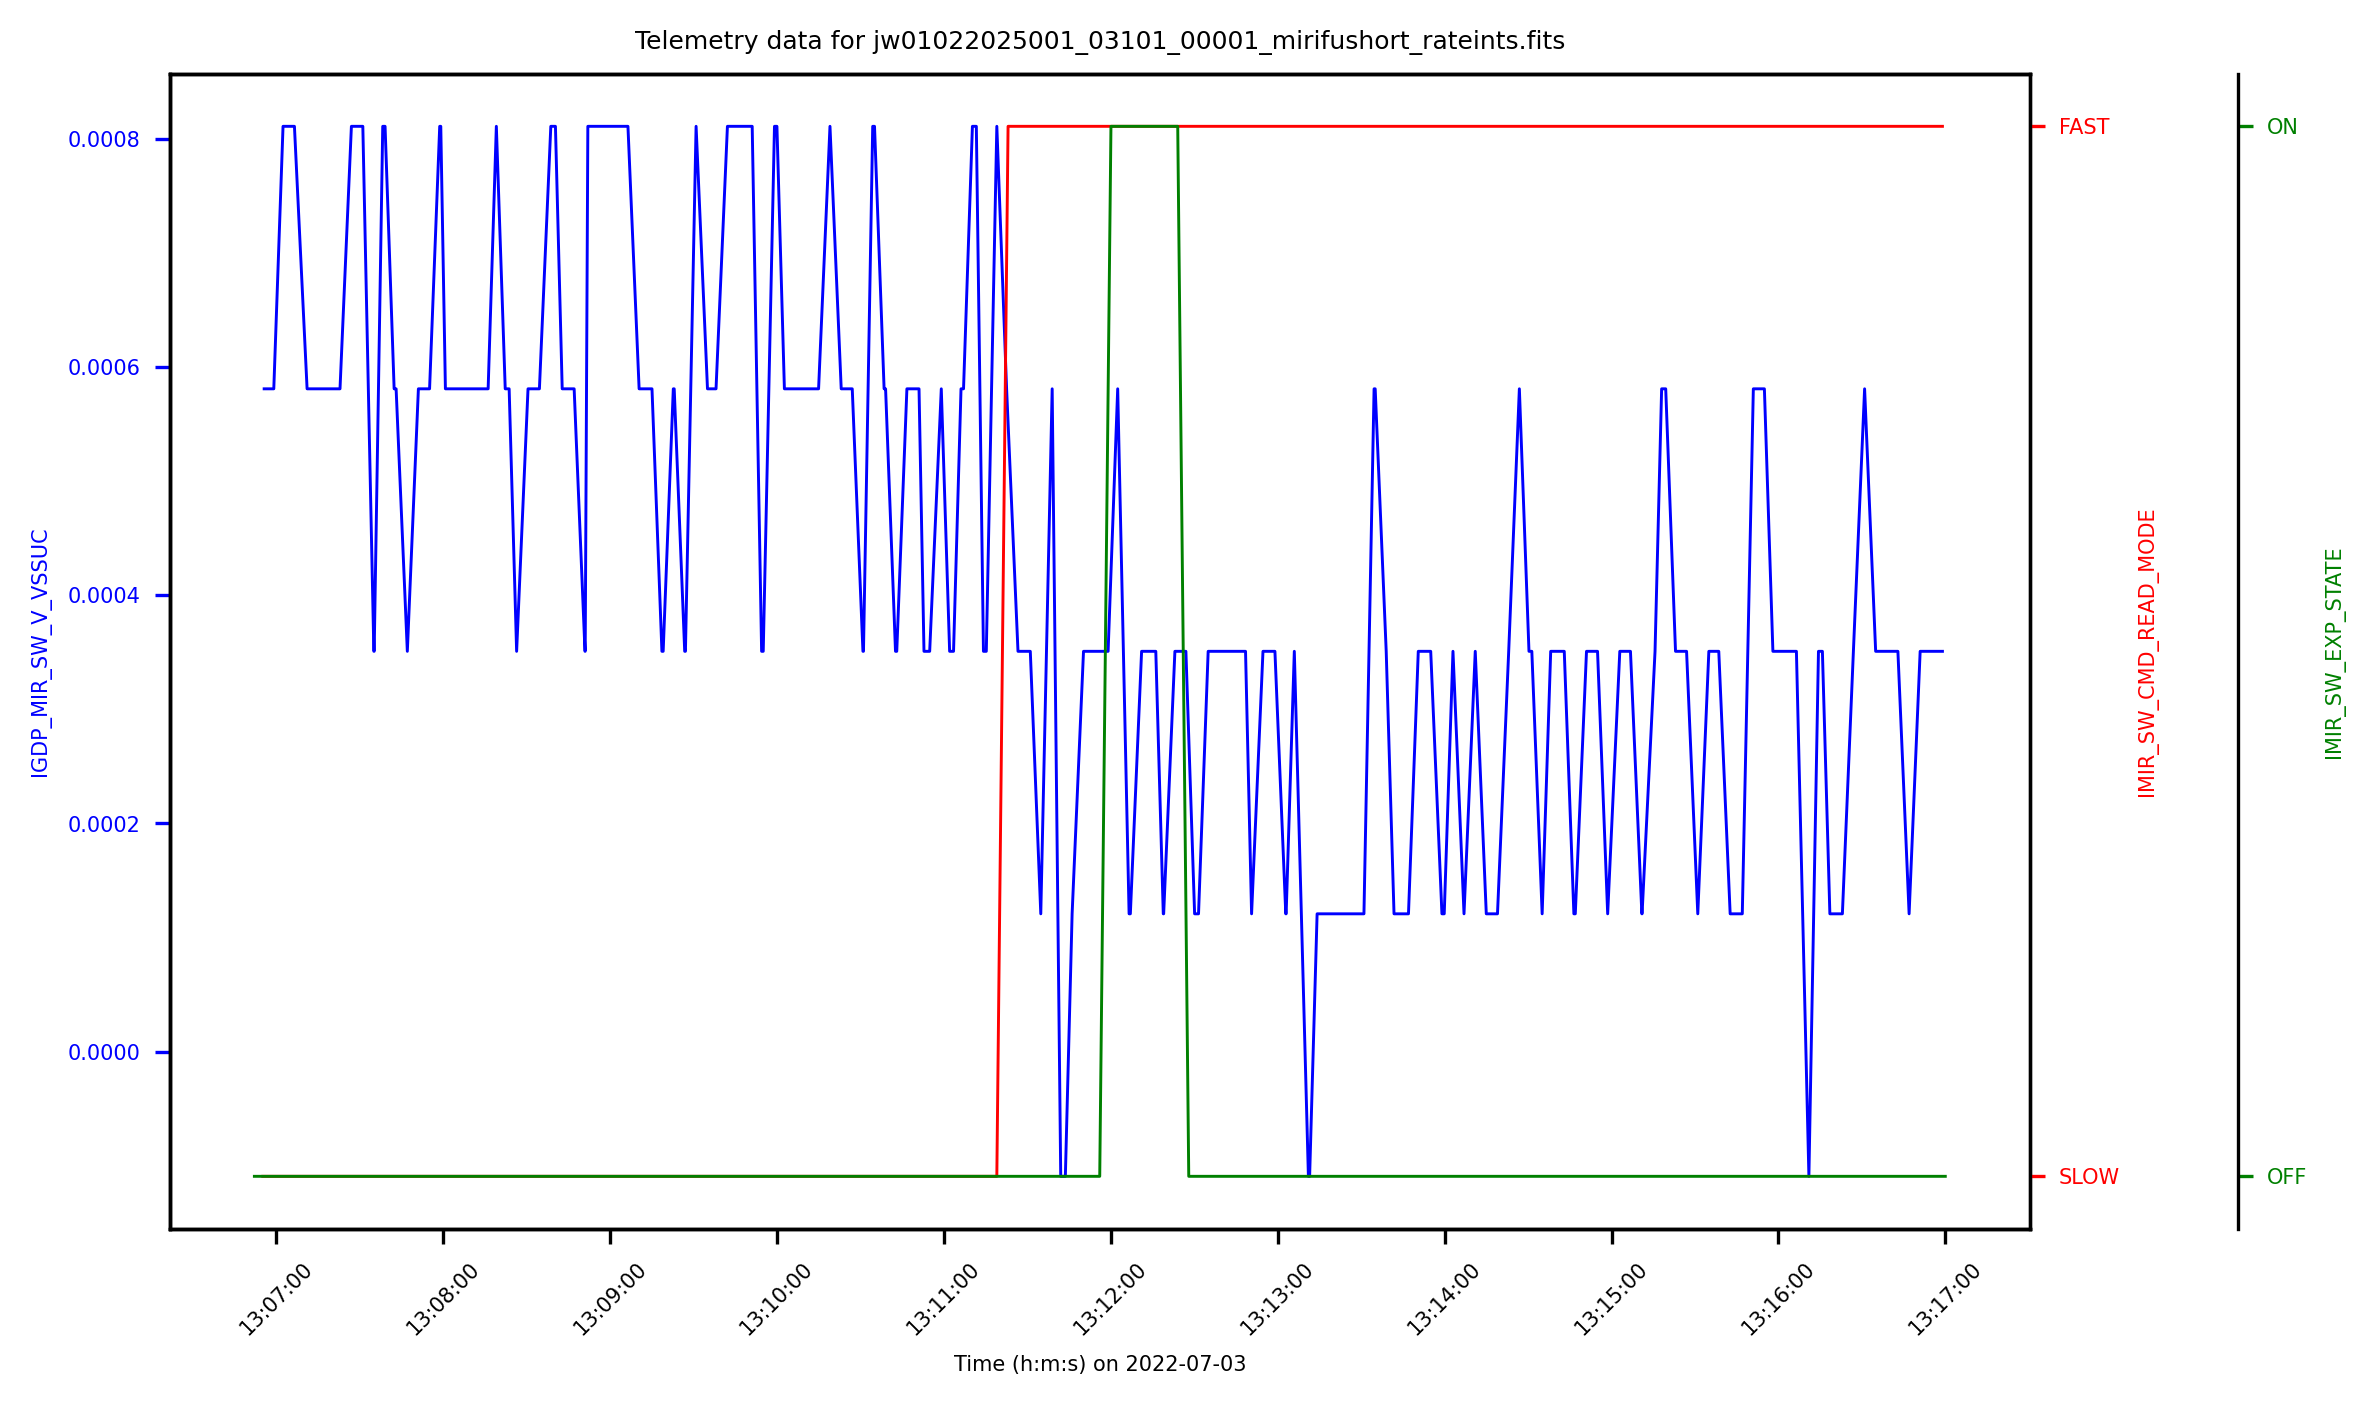

In [30]:
plt.rcParams.update({'font.size': 5})

if fitsfiles:
    if type(fitsfiles) is str:
        fitsfiles = [fitsfiles]
    for fitsfile in fitsfiles:
        mnemonics = {}
        times, savedir = GetTimes(file=fitsfile, outdir = outdir)
        print(savedir)
        for mnemo in telemetry_data:
            mnemonics.update({mnemo:times})
        for m,v in mnemonics.items():
            print(m, v)
        fnames = ['-'.join([m, v['t_start'], v['t_end']]) + '.csv' for m,v in mnemonics.items()]
        print(fnames)
        status = download_edb_datafiles(fnames, folder=savedir)
        files = [glob.glob(os.path.join(savedir, f'*{tele}*.csv'))[0] for tele in telemetry_data]
        title = f"Telemetry data for {fitsfile.split('/')[-1]}"
        DoPlot(files, telemetry_data, title)
else:
    mnemonics = {}
    for t in range(len(t_start)):
        times, savedir = GetTimes(t_start=t_start[t], t_end=t_end[t], out_dir = outdir)
        for mnemo in telemetry_data:
            mnemonics.update({mnemo:times})
        fnames = ['-'.join([m, v['t_start'], v['t_end']]) + '.csv' for m,v in mnemonics.items()]
        status = download_edb_datafiles(fnames, folder=savedir)
        files = [glob.glob(os.path.join(savedir, f'*{tele}*.csv')) for tele in telemetry_data]
        title = f"Telemetry data for {datetime.datetime.strptime(times['t_start'], '%Y-%m-%dT%H:%M:%S.%f')}"
        DoPlot(files, telemetry_data, title)
